# DATASET PRECIPITAÇÕES MARACANAU


In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima.arima import auto_arima

import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning)

In [3]:
!gdown 1rdkky7uocOUjzwcULoEfEermkKluYkFL

Downloading...
From: https://drive.google.com/uc?id=1rdkky7uocOUjzwcULoEfEermkKluYkFL
To: /content/82-2.csv
100% 116k/116k [00:00<00:00, 68.4MB/s]


In [4]:
df = pd.read_csv('82-2.csv', delimiter=',')

In [5]:
df.head()

,Municipios,Postos,Latitude,Longitude,Anos,Meses,Total,Dia1,Dia2,Dia3,...,Dia22,Dia23,Dia24,Dia25,Dia26,Dia27,Dia28,Dia29,Dia30,Dia31
0,Maracanaú,MARACANAU,-3.884889,-38.631306,1974,1,254.2,0.0,0.0,0.0,...,19.0,5.0,1.0,9.0,30.0,17.0,75.0,25.0,5.0,10.0
1,Maracanaú,MARACANAU,-3.884889,-38.631306,1974,2,202.0,30.0,20.0,10.0,...,6.0,0.0,8.0,14.0,4.0,0.0,9.0,888.0,888.0,888.0
2,Maracanaú,MARACANAU,-3.884889,-38.631306,1974,3,498.1,23.0,111.0,13.0,...,0.0,19.0,0.0,45.0,20.0,0.0,12.0,0.0,0.0,25.0
3,Maracanaú,MARACANAU,-3.884889,-38.631306,1974,4,407.0,7.0,42.0,10.0,...,0.0,70.0,6.0,14.0,75.0,20.0,15.0,0.0,20.0,888.0
4,Maracanaú,MARACANAU,-3.884889,-38.631306,1974,5,335.0,105.0,0.0,12.0,...,46.0,6.0,0.0,20.0,0.0,0.0,0.0,52.0,0.0,25.0


In [6]:
# prompt: crie uma coluna data juntando anos meses e as colunas dia e transforme em date time

df['data'] = pd.to_datetime(df['Anos'].astype(str) + '-' + df['Meses'].astype(str))
df = df.set_index('data')
series = df[['Total']].copy()
series.head()

,Total
data,
1974-01-01,254.2
1974-02-01,202.0
1974-03-01,498.1
1974-04-01,407.0
1974-05-01,335.0


In [7]:
def teste_estacionaridade(x):
    x = x[np.isfinite(x)]

    kpss = statsmodels.tsa.stattools.kpss(x)
    valor_critico = kpss[3]['5%']
    teste = kpss[0]
    if teste <= valor_critico:
        print('A série é estacionária')
    else:
        print('A série NÃO é estacionária')

def teste_normalidade(x):
    e, p = stats.shapiro(x)
    if p < 0.05:
        print('A distribuição NÃO é normal')
    else:
        print('A distribuição é normal')

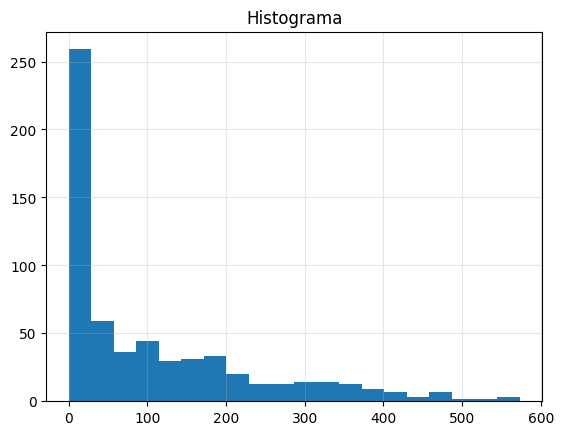

In [8]:
plt.figure()
plt.title('Histograma')
plt.hist(series.dropna(), bins=20)
plt.grid(alpha=0.3)

# Analisar as médias móveis;

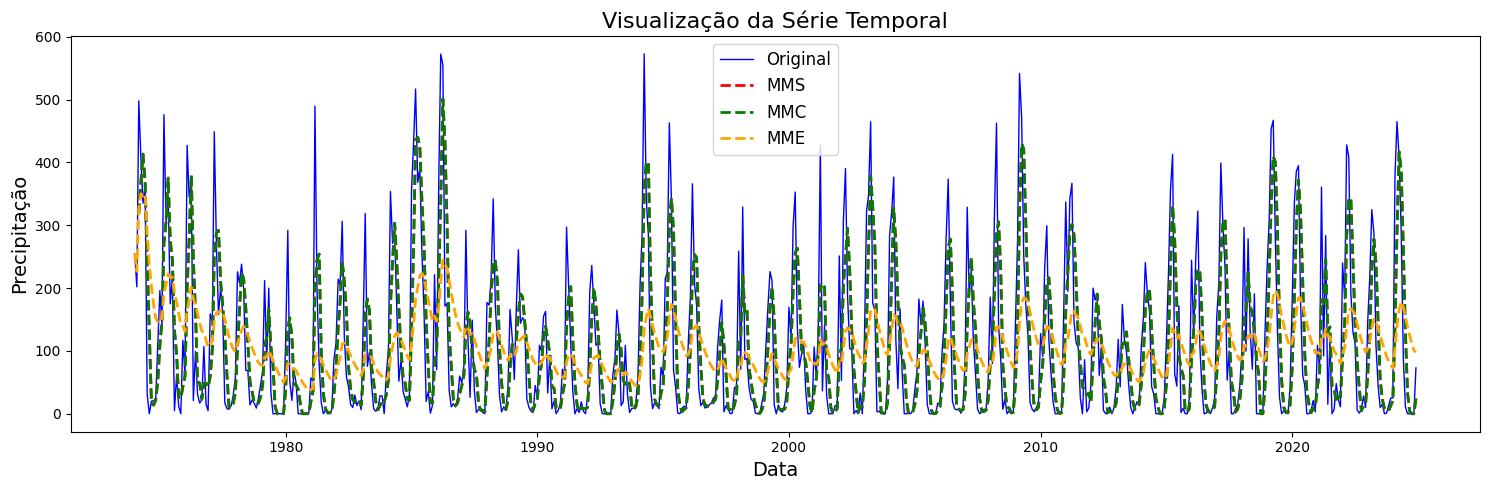

In [9]:
plt.figure(figsize=(15, 5))

plt.plot(series, color='blue', linewidth=1, label='Original')
plt.plot(series.rolling(3).mean(), c='red', lw=2, ls='--', label='MMS')
plt.plot(series.rolling(3).mean(), c='green', lw=2, ls='--', label='MMC')
plt.plot(series.ewm(alpha=0.1).mean(), c='orange', lw=2, ls='--', label='MME')

plt.title('Visualização da Série Temporal', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Precipitação', fontsize=14)

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Verificar estacionariedade e normalidade da série;

In [10]:
teste_estacionaridade(series)
teste_normalidade(series)

A série é estacionária
A distribuição NÃO é normal


# Realizar a decomposição da série em: Tendência, Sazonalidade e Resíduo;

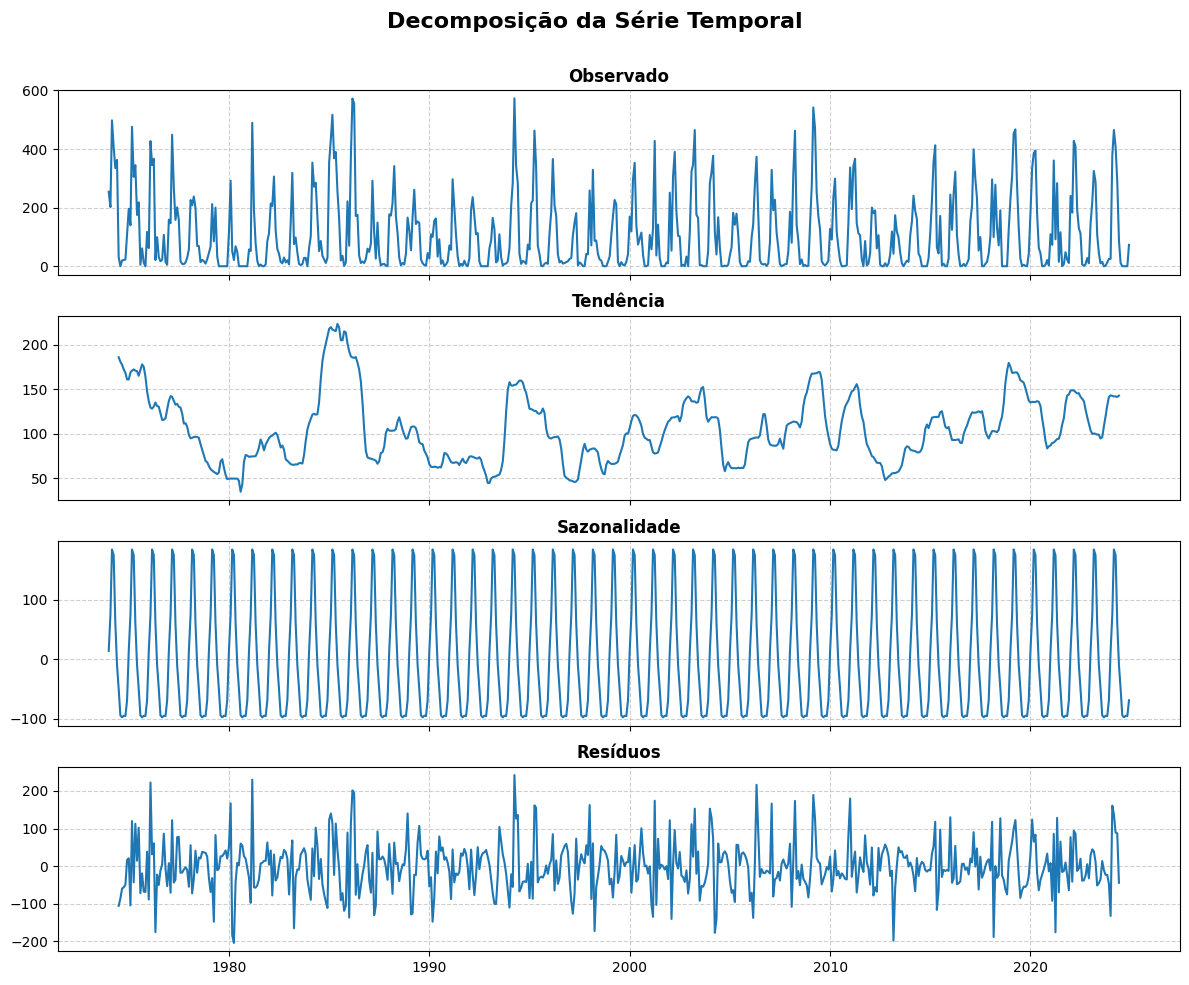

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao1 = seasonal_decompose(series, period=12)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Títulos e componentes
components = ['Observado', 'Tendência', 'Sazonalidade', 'Resíduos']
plots = [decomposicao1.observed, decomposicao1.trend, decomposicao1.seasonal, decomposicao1.resid]

for ax, comp, title in zip(axes, plots, components):
    ax.plot(comp, linewidth=1.5)
    ax.set_title(title, fontsize=12, weight='bold')
    ax.grid(True, linestyle='--', alpha=0.6)

fig.suptitle('Decomposição da Série Temporal', fontsize=16, weight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

# Aplicar alguma transformação na série;

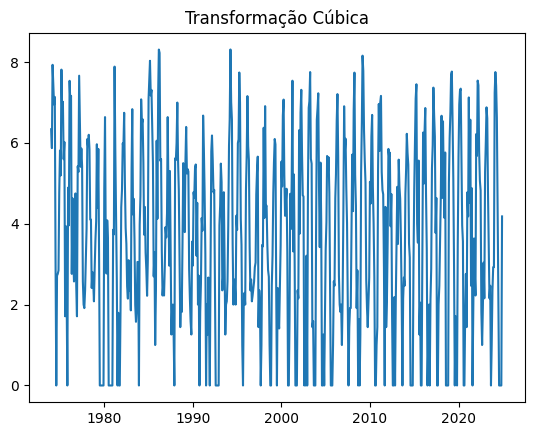

In [12]:
serie_cubica = series ** (1/3)

plt.figure()
plt.title('Transformação Cúbica')
plt.plot(serie_cubica)
plt.show()

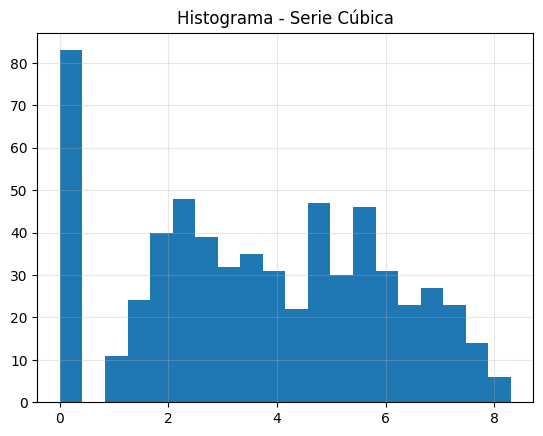

In [13]:
plt.figure()
plt.title('Histograma - Serie Cúbica')
plt.hist(serie_cubica.dropna(), bins=20)
plt.grid(alpha=0.3)

In [14]:
teste_estacionaridade(serie_cubica)
teste_normalidade(serie_cubica)

A série é estacionária
A distribuição NÃO é normal


In [15]:
serie_cubica

,Total
data,
1974-01-01,6.334687
1974-02-01,5.867464
1974-03-01,7.926939
1974-04-01,7.410795
1974-05-01,6.945150
...,...
2024-08-01,0.000000
2024-09-01,0.000000
2024-10-01,0.000000


# Escolher um modelo para séries temporais e realizar previsões.

In [16]:
from pmdarima.arima import auto_arima

In [17]:
print("\n### Modelo AUTO-ARIMA ###")
modelo_auto = auto_arima(
    serie_cubica,
    trace=True,          # Exibe o progresso e combinações de parâmetros testados
    stepwise=True,       # Utiliza busca stepwise para acelerar o processo de ajuste
    seasonal=True,       # Considera sazonalidade no modelo (ativa P, D, Q, m)
    max_p=16,            # Máximo número de lags autorregressivos (p)
    max_q=6,             # Máximo número de lags para média móvel (q)
    max_P=16,            # Máximo número de componentes sazonais autorregressivos (P)
    max_Q=6,             # Máximo número de componentes sazonais de média móvel (Q)
    start_p=0,           # Valor inicial para p
    start_q=0,           # Valor inicial para q
    start_P=0,           # Valor inicial para P
    start_Q=0,           # Valor inicial para Q
    m=12                 # Sazonalidade mensal (período da série, ex.: 12 meses)
)


### Modelo AUTO-ARIMA ###
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2747.157, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2213.500, Time=3.31 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2363.721, Time=1.09 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3534.999, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2361.393, Time=0.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=2152.665, Time=2.34 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=8.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=5.82 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.67 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=17.87 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=2216.800, Time=1.75 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=2146.979, Time=2.54 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2209.914, Time=1.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=8.58 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=6.86 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.88 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=20.81 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=2148.226, Time=4.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=2147.959, Time=4.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=2148.620, Time=7.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,0,0)[12] intercept   : AIC=2149.848, Time=15.36 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,0)[12]             : AIC=inf, Time=1.27 sec

Best model:  ARIMA(2,0,0)(2,0,0)[12] intercept
Total fit time: 118.541 seconds


In [18]:
print("AIC do modelo AUTO-ARIMA:", modelo_auto.aic())

AIC do modelo AUTO-ARIMA: 2146.9786899526707


In [19]:
previsao_auto = modelo_auto.predict(n_periods=12)  # Prever 12 períodos futuros
previsao_auto_cubica = previsao_auto ** 3  # Revertendo a transformação cúbica

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


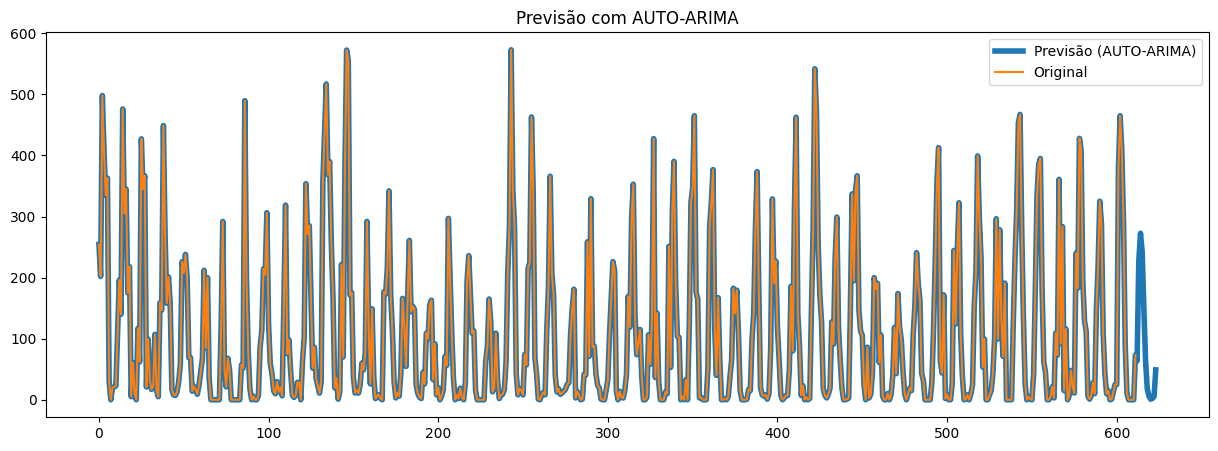

In [20]:
serprev = list(series.values) + list(previsao_auto_cubica)
previsao = pd.Series(data=serprev, index=pd.date_range(start='1974-01-01', freq='ME', periods=len(serprev)))

plt.figure(figsize=(15, 5))
plt.plot(range(len(previsao)), previsao, label='Previsão (AUTO-ARIMA)', lw=4)
plt.plot(range(len(series)), series, label='Original')
plt.legend()
plt.title('Previsão com AUTO-ARIMA')
plt.show()